# Exploratory Data Analysis

In this section, we will outline our exploratory data analysis workflow in order to better understand the characteristics of properties and how they relate to property sale price.

In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# opening cleaned dataset
housing_data = pd.read_csv('KC_Data/cleaned_housing_data', index_col = 0)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28415 entries, 0 to 28543
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          28415 non-null  float64
 1   bedrooms       28415 non-null  int64  
 2   bathrooms      28415 non-null  float64
 3   sqft_living    28415 non-null  int64  
 4   sqft_lot       28415 non-null  int64  
 5   floors         28415 non-null  float64
 6   waterfront     28415 non-null  object 
 7   greenbelt      28415 non-null  object 
 8   nuisance       28415 non-null  object 
 9   view           28415 non-null  int64  
 10  condition      28415 non-null  int64  
 11  grade          28415 non-null  int64  
 12  sqft_above     28415 non-null  int64  
 13  sqft_basement  28415 non-null  int64  
 14  sqft_garage    28415 non-null  int64  
 15  sqft_patio     28415 non-null  int64  
 16  yr_built       28415 non-null  int64  
 17  yr_renovated   28415 non-null  int64  
 18  lat   

## Plotting Pairwise Relationships 

Our first step in EDA is to plot a pairplot across all features so as to understand the distribution based on price. 

In [3]:
# creating a pairplot for entire dataframe
#sns.pairplot(housing_data.sample(2000))

## Price
Our cleaned dataset contains non-waterfront properties. During our data wrangling, we determined that waterfront properties have a higher median sale price compared to non-waterfront properties, thus we excluded them. For modeling purposes, let's look at the price distribution for non-waterfront properties. 

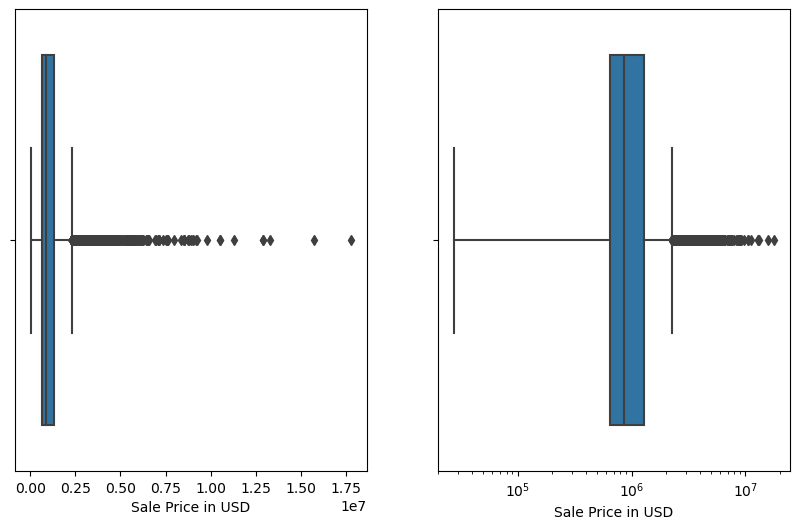

In [4]:
# plotting the distribution of property sale price
fig, ax = plt.subplots(1,2, figsize = (10, 6))
ax[0] = sns.boxplot(x = housing_data['price'], data = housing_data, ax = ax[0])
ax[1] = sns.boxplot(x = housing_data['price'], data = housing_data, ax = ax[1])
ax[0].set_xlabel("Sale Price in USD")
ax[1].set_xlabel("Sale Price in USD")
ax[1].set_xscale('log')

A side-by-side comparision using different `x_axis` scaling (left = standard, right = log). We can see that our distribution still contains a lot of outliers resulting in a tight, hard to understand box plot. The right plot tells us that the distribution of properties' sale price is concentrated around 1 mil USD.

For a more robust analysis and to be able to narrow our focus on properties where the distribution of prices is more concentrated, we shall use the IQR to calculate our upper bound ('whisker') and use that to filter out our desired sample. Let's call our new dataframe `develop_houses`.

In [5]:
#calculating IQR for house price to filter out outliers 
iqr = (housing_data[['price']].quantile(0.75))- (housing_data[['price']].quantile(0.25))
upper_bound = housing_data['price'].quantile(0.75) + (1.5 * iqr)
price_min = housing_data['price'].min()
print(f"The distribution of properties' sale price falls between ${price_min} USD  ${upper_bound[0]} USD")

The distribution of properties' sale price falls between $27360.0 USD  $2282500.0 USD


Based on the IQR for housing prices, we can filter out records that fall between the absolute minimum `($27,360 USD)` and the upper bound of the distribution `($2,282,500 USD)`. From this, let's calculate a new dataframe `develop_houses` that takes into consideration our findings. Additionally, we'll want to compare the price distribution before and after filtering. 

In [6]:
# filtering out our dataframe to only include prices within the absolute minimum and upper bound
develop_houses = housing_data[(housing_data['price'] >= 27360) & (housing_data['price'] <= 2282500)]
develop_houses

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
1       750000.0         3        2.0         1830      7969     1.0   
2       728000.0         4        2.0         2170      7520     1.0   
3       565000.0         4        2.0         1400     10364     1.5   
4       645000.0         3        2.0         1520      8250     1.0   
...          ...       ...        ...          ...       ...     ...   
28539  1826000.0         2        3.0         2070     71264     2.0   
28540   256000.0         2        1.0         1330    113815     1.0   
28541   950000.0         2        2.0         1960     11406     2.0   
28542   450000.0         2        2.0          840    138520     1.0   
28543   400000.0         1        1.0          760    148975     2.0   

      waterfront greenbelt nuisance  view  condition  grade  sqft_above  \
0             NO        NO       NO     0          4      7        1180   
1             NO        NO       NO     0          3      7         930   
2             NO        NO       NO     0          3      7        1240   
3             NO        NO       NO     0          4      6        1400   
4             NO        NO       NO     0          3      8        1190   
...          ...       ...      ...   ...        ...    ...         ...   
28539         NO        NO       NO     4          3      9        2070   
28540         NO        NO       NO     0          4      7        1330   
28541         NO        NO       NO     2          3      7        1960   
28542         NO        NO       NO     0          3      6         840   
28543         NO        NO       NO     0          1      2         760   

       sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated  \
0                  0            0          40      1969             0   
1                930          240          90      1950          2008   
2               1240          490          60      1973             0   
3                  0          330         330      1971             0   
4                590          420         200      1981             0   
...              ...          ...         ...       ...           ...   
28539           1360          480         952      2001             0   
28540              0          280           0      1911          1962   
28541            840          420         560      1938          1985   
28542              0            0         230      2020             0   
28543              0            0         200      1983             0   

             lat        long  zipcode    city  sold_year  sold_month  \
0      47.461975 -122.190520    98055  Renton       2022           5   
1      47.466730 -122.214000    98055  Renton       2022           3   
2      47.463930 -122.189740    98055  Renton       2022           3   
3      47.448450 -122.212430    98055  Renton       2022           3   
4      47.460870 -122.188690    98055  Renton       2021          12   
...          ...         ...      ...     ...        ...         ...   
28539  47.504070 -122.471550    98070  Vashon       2021          12   
28540  47.387960 -122.456440    98070  Vashon       2022           4   
28541  47.386190 -122.387935    98070  Vashon       2021           7   
28542  47.458555 -122.475450    98070  Vashon       2021           9   
28543  47.415170 -122.505720    98070  Vashon       2021           6   

       age_sold  renovated price_group  
0            53      False     500K-1M  
1            72       True     500K-1M  
2            49      False     500K-1M  
3            51      False     500K-1M  
4            40      False     500K-1M  
...         ...        ...         ...  
28539        20      False     1.5M-2M  
28540       111       True       <500K  
28541        83       True     500K-1M  
28542         1      False       <500K  
28543        38      False       <500K  

[26709 row

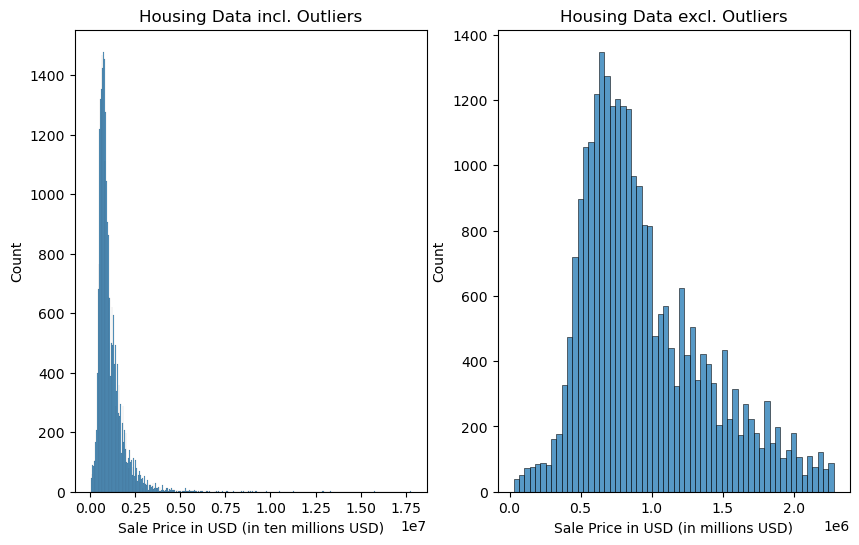

In [57]:
# creating a side-by-side comparision before and after filtering records
fig, ax = plt.subplots(1,2, figsize = (10, 6))
ax[0] = sns.histplot(x = housing_data['price'], data = housing_data, ax = ax[0])
ax[0].set_title("Housing Data incl. Outliers")
ax[0].set_xlabel("Sale Price in USD (in ten millions USD)")
ax[1].set_title("Housing Data excl. Outliers")
ax[1] = sns.histplot(x = develop_houses['price'], data = develop_houses, ax = ax[1])
ax[1].set_xlabel("Sale Price in USD (in millions USD)")
fig.savefig("pricedistrib", dpi=300)

After filtering prices based on the IQR of the entire dataset, we have a narrower focus on the kinds of properties our model will take into consideration. Our new dataset considers all properties that have been sold at a price range between `($27,360 USD)` and `($2,282,500 USD)`.

### Exporting Filtered Dataframe 

For our future modeling purposes, let's export the filtered dataset into a new file so as to have a streamlined process. 

In [8]:
# exporting filtered dataframe to new csv file
develop_houses.to_csv('KC_Data/filtered_data.csv')

## Correlation Matrix for all Possible Predictor Variables & Price

Text(0.5, 1.0, 'Correlation Matrix for all Possible Predictor Variables & Price')

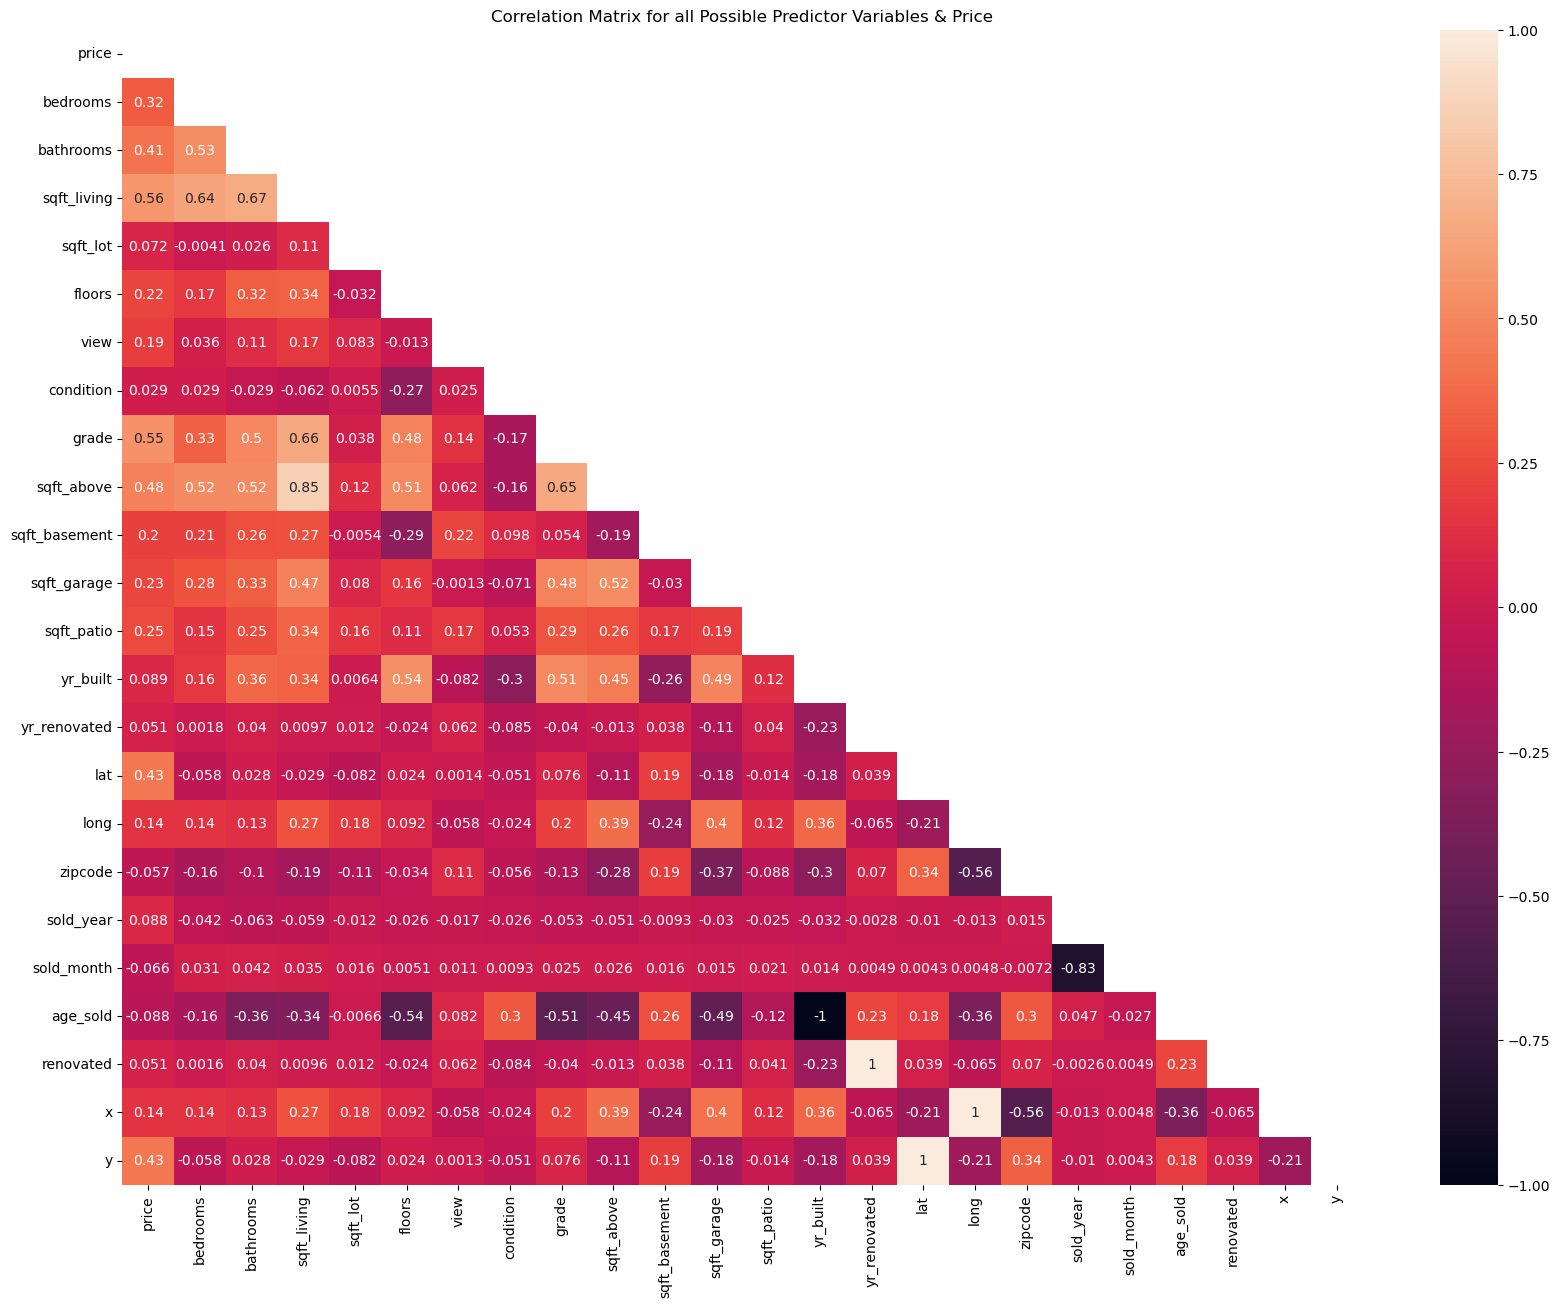

In [61]:
# plotting a correlation matrix heatmap between all potential predictor variables and price
fig, ax = plt.subplots(figsize = (20,15))
mask = np.triu(np.ones_like(develop_houses.corr(numeric_only = True), dtype=bool))
ax = sns.heatmap(develop_houses.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)
ax.set_title("Correlation Matrix for all Possible Predictor Variables & Price")

## Correlation Matrix for all Numeric Features

Our goal is to construct a multilinear regression model. In order to check for collinearity between our predictor variables, we should create a heatmap to parse through them.

In [9]:
# creating a new dataframe including only predictor variables
X = develop_houses.drop(columns = ['price'])

Text(0.5, 1.0, 'Correlation Matrix for all Numeric Features')

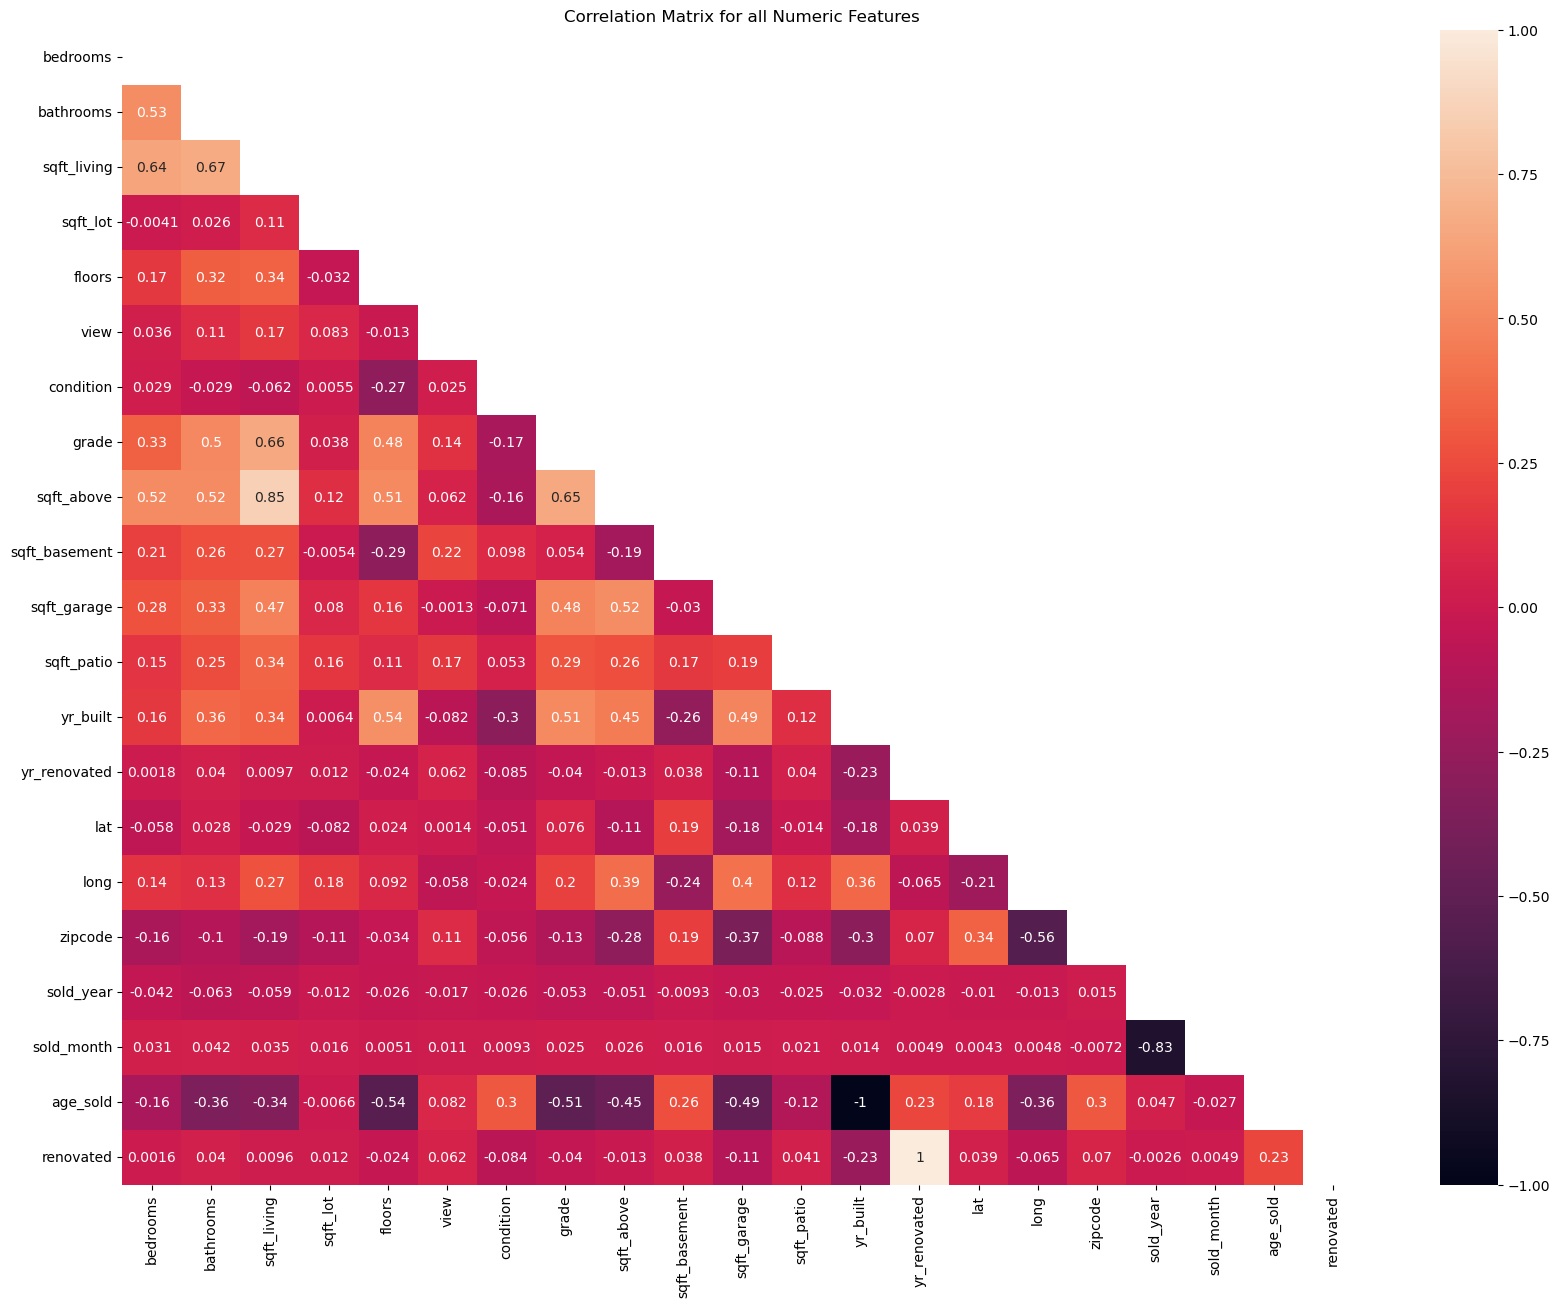

In [10]:
# plotting a correlation matrix heatmap between all numeric features
fig, ax = plt.subplots(figsize = (20,15))
mask = np.triu(np.ones_like(X.corr(numeric_only = True), dtype=bool))
ax = sns.heatmap(X.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)
ax.set_title("Correlation Matrix for all Numeric Features")

Lots of highly correlated variables: 
- `bathrooms` and `bedrooms`
- `sqft_living` and `bedrooms`
- `sqft_above` and `bedrooms`, `sqft_living`, `grade`
- `grade` and `bathrooms`, `sqft_living`, 

## Property Infrastructure 
This section will cover an EDA of property characteristics (e.g., `grade`, `condition`) in relation to `price`.

First, let's create a subset of columns corresponding to property infrastructure and call it `prop_infra`.

In [11]:
develop_houses.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'zipcode', 'city', 'sold_year',
       'sold_month', 'age_sold', 'renovated', 'price_group'],
      dtype='object')

In [12]:
# creating a new dataframe containing price and all features related to property infrastructure
prop_infra = develop_houses.loc[:,['price','condition', 'grade', 'renovated', 'yr_renovated']]

### Correlation Matrix Between Price & Property Infrastructure Features

<Axes: >

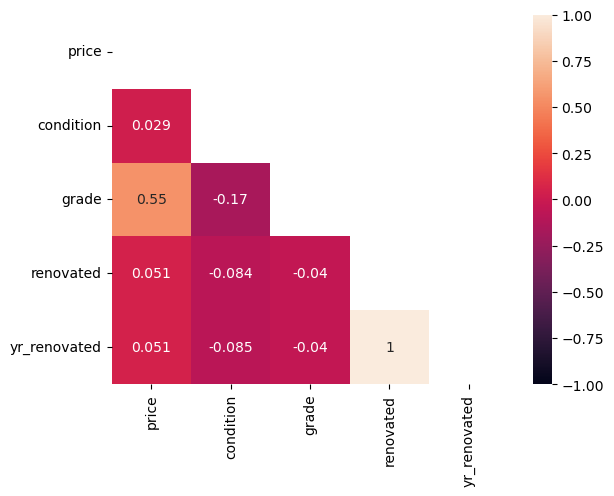

In [13]:
# creating a heatmap showing the correlation between target and subsetted predictor variables 
mask = np.triu(np.ones_like(prop_infra.corr(numeric_only = True), dtype=bool))
sns.heatmap(prop_infra.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

After plotting a heatmap of the correlation between features related to the property's infrastructure, we can see that `grade` is moderately correlated with price. Thus, it might be worth considering it as a key feature in our model.

### Property Construction Quality

`grade` in our dataset refers to the construction quality of improvements. Lower scores indicate that the properties are generally older and have lower construction quality. Higher scores indicate that the property may have more detailed finish and luxury features. For detailed information on each grade value refer to documentated found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

In [14]:
# viewing the value counts for building grade
prop_infra['grade'].value_counts().sort_index()

2         1
3         7
4        37
5       345
6      2726
7     11256
8      8534
9      2973
10      719
11      100
12       10
13        1
Name: grade, dtype: int64

Text(0, 0.5, 'Property Sale Price (in millions USD)')

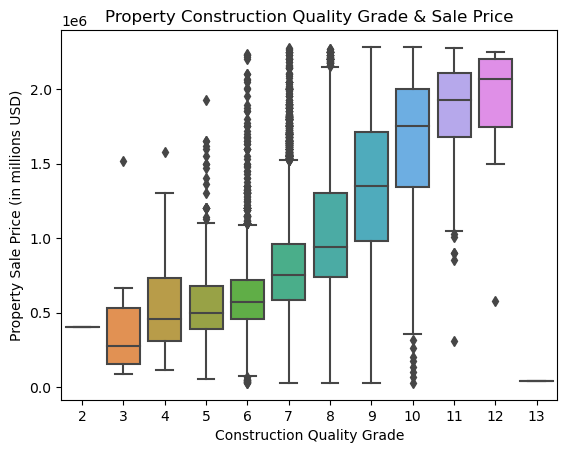

In [15]:
# plotting grade in relation to property sale price
ax = sns.boxplot(x = 'grade', y = 'price', data = prop_infra)
ax.set_title("Property Construction Quality Grade & Sale Price")
ax.set_xlabel("Construction Quality Grade")
ax.set_ylabel("Property Sale Price (in millions USD)")

In relation to `grade`, we can see that when a property has a higher construction quality (i.e., has better materials and amenities), the median property sale price increases. The greatest change in median sale price for properties occurs when construction quality has a grade of at least 6. 

### Property Condition
`condition` in our datset refers to the property's condition in relation to `age` and `grade`. Buildings with `poor` condition refer to properties in major disrepair whereas `very good` includes properties that are well-maintained.

Text(0, 0.5, 'Property Sale Price (in millions USD)')

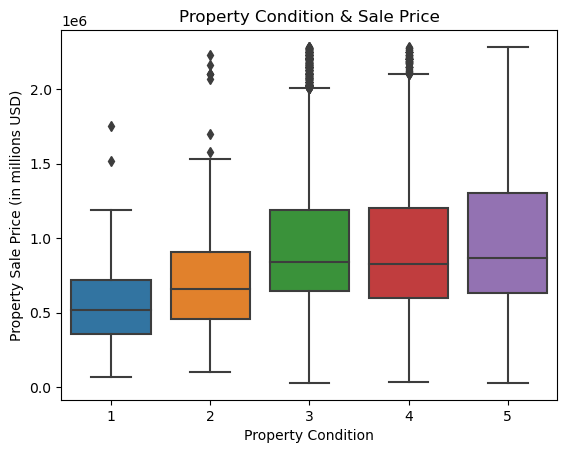

In [16]:
# plotting building condition in relation to property sale price 
ax = sns.boxplot(x = 'condition', y = 'price', data = prop_infra)
ax.set_title("Property Condition & Sale Price")
ax.set_xlabel("Property Condition")
ax.set_ylabel("Property Sale Price (in millions USD)")

Based on our boxplot, we can see that compared to properties whos `condition` is either `Poor` (`condition` = 1) or `Fair` (`condition` = 2), properties where condition is at least `Average` have an increased median sale price. 

### Building Renovations
`renovated` in our dataset considers whether a property had any renovations made prior to being listed and sold. 

Text(0, 0.5, 'Property Sale Price (in millions USD)')

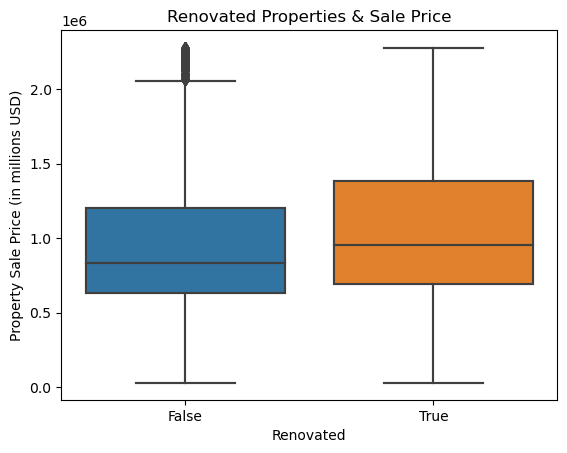

In [17]:
# plotting median property sale price by property renovations
sns.boxplot(x = 'renovated', y = 'price', data = prop_infra)
ax = sns.boxplot(x = 'renovated', y = 'price', data = prop_infra)
ax.set_title("Renovated Properties & Sale Price")
ax.set_xlabel("Renovated")
ax.set_ylabel("Property Sale Price (in millions USD)")

Based on our boxplot, properties that were renovated have an increased median sale price compared to properties that did not have any renovations done when they were sold.

### Collinearity Matrix for Property Infrastructure Features

<Axes: >

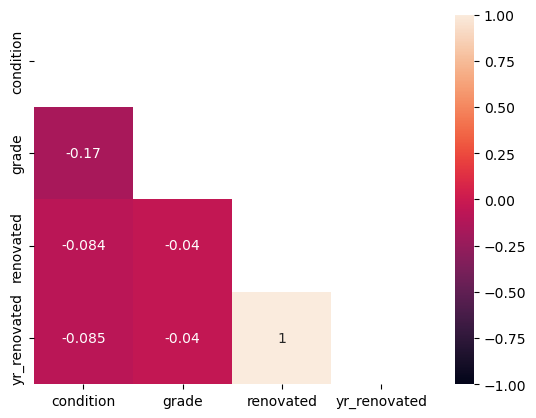

In [18]:
# creating a new dataframe of only predictor variables assoc. with property infrastructure
infrastructure_corr = prop_infra.drop(columns = ['price'])

# plotting a heatmap to check for collinearity among predictor variables
mask = np.triu(np.ones_like(infrastructure_corr.corr(numeric_only = True), dtype=bool))
sns.heatmap(infrastructure_corr.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

Our correlation matrix shows that between infrastructure features, the predictor variables are not strongly correlated with one another. 

## Interior Property Features
This section will cover an EDA of interior property features (e.g., `bedrooms`, `bathrooms`, `floors`, etc...) 

In [19]:
# creating a new dataframe containing price and related interior property characteristics
interior_feat = develop_houses.loc[:, ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement']]

### Correlation Matrix Between 'Price' & Interior Property Features

<Axes: >

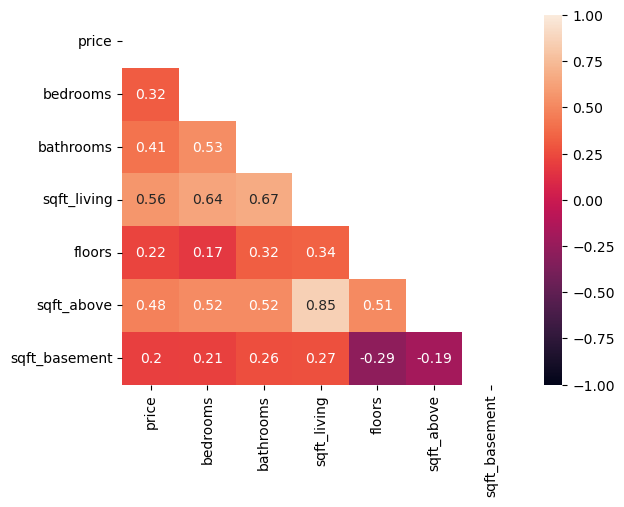

In [20]:
# plotting correlation matrix between interior prop features and price
mask = np.triu(np.ones_like(interior_feat.corr(numeric_only = True), dtype=bool))
sns.heatmap(interior_feat.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

After plotting a heatmap of the correlation between features related to the property's interior features, we can see that `sqft_living` is moderately correlated with price. Thus, it might be worth considering it as a key feature in our model.

### Bedrooms

Text(0, 0.5, 'Property Sale Price (in millions USD)')

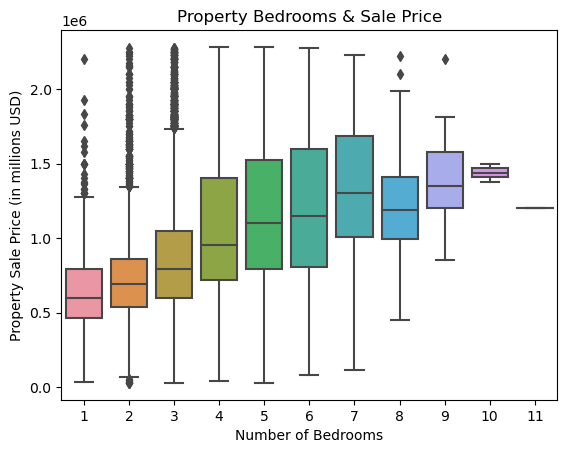

In [21]:
# plotting number of bedrooms in relation to property sale price 
ax = sns.boxplot(x = 'bedrooms', y = 'price', data = develop_houses)
ax.set_title("Property Bedrooms & Sale Price")
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Property Sale Price (in millions USD)")

Properties have an increased median sale price when the number of bedrooms < = 7, however when bedrooms exceed 7, property value (i.e., median sale price) decreases.

### Bathrooms

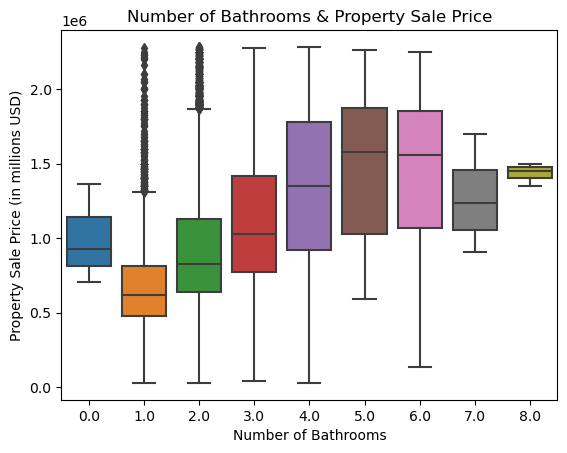

In [22]:
# plotting number of bathrooms in relation to property sale price 
ax = sns.boxplot(x = 'bathrooms', y = 'price', data = develop_houses)
ax.set_title("Number of Bathrooms & Property Sale Price")
ax.set_xlabel("Number of Bathrooms")
ax.set_ylabel("Property Sale Price (in millions USD)")
plt.savefig("bathroomrenov.jpg", dpi = 300)

When properties have ~ 4.5 bathrooms, they have the highest median sale price when they are sold. Where properties have ~ 5 - 5.5 bathrooms, median sale price dips. 

### Living Space (sqft)
`sqft_living` in our dataset refers to the square footage of the living space in the home. However, we find it important to look at the distribution first to better understand the properties within the dataset.

Text(0.5, 0, 'Living Space (sqft)')

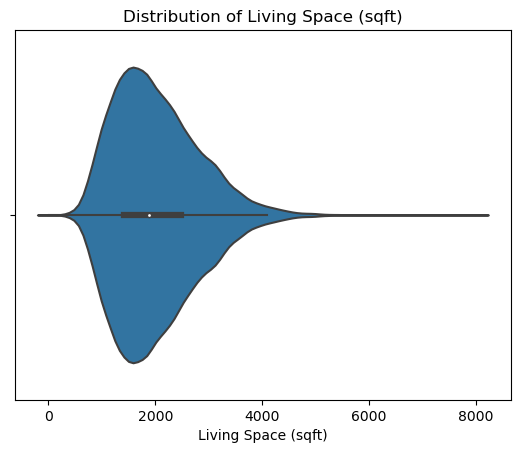

In [23]:
# plotting the distribution of living space in sqft
ax = sns.violinplot(x = develop_houses['sqft_living'])
ax.set_title("Distribution of Living Space (sqft)")
ax.set_xlabel("Living Space (sqft)")

The violinplot maps out the distribution of `sqft_living` and tells us that the majority of properties have living spaces concentrated around 2,000 sqft. `sqft_living` is a skewed-right distribution. If we plot `sqft_living` in relation to `price`, it will be hard to visualize. For cleaner visualization, let's calculate the IQR for `sqft_living` and create corresponding bins based on quantiles to better understand the relationship between `sqft_living` and `price`.

In [24]:
# viewing the IQR for living space 
interior_feat['sqft_living'].describe()

count    26709.000000
mean      2006.032124
std        796.617102
min          3.000000
25%       1410.000000
50%       1880.000000
75%       2480.000000
max       8020.000000
Name: sqft_living, dtype: float64

In [25]:
# creating bins based on the quantiles for living space
pd.qcut(interior_feat['sqft_living'], q=4)

# creating a new column based on the quantiles / bins
interior_feat['living_space'] = pd.qcut(interior_feat['sqft_living'], q=4)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

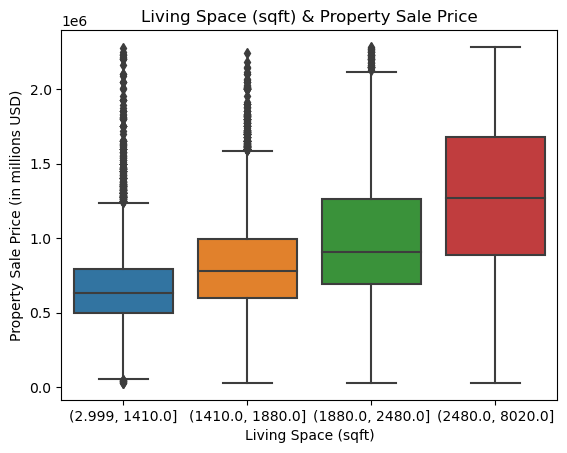

In [26]:
# plotting living space as quantiles in relation to property sale price 
ax = sns.boxplot(x = 'living_space', y = 'price', data = interior_feat)
ax.set_title("Living Space (sqft) & Property Sale Price")
ax.set_xlabel("Living Space (sqft)")
ax.set_ylabel("Property Sale Price (in millions USD)")

After binning, we can see that properties with larger living spaces have an increased property sale price. Where 50% of properties are contained, that is data contained within the 2nd and 3rd box plots, an increse in `living space` (sqft) contributes to a greater median sale price. 

### Basement

Let's examine whether properties that have a basement or not have any effect in property sale price.

In [27]:
# creating a new column 'basement' that assumes boolean values based on whether there is a basement in properties sold
interior_feat['basement'] = interior_feat['sqft_basement'] != 0 

Text(0, 0.5, 'Property Sale Price (in millions USD)')

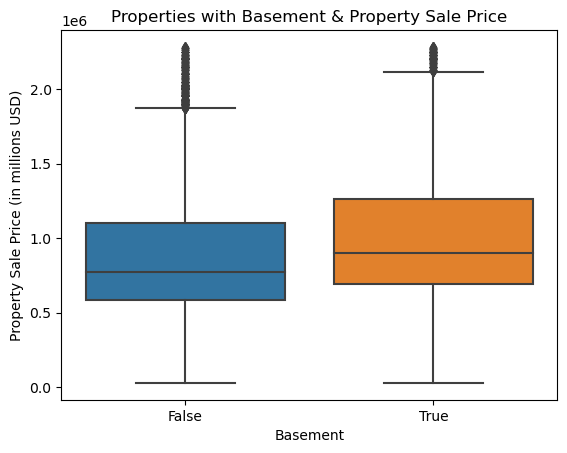

In [28]:
ax = sns.boxplot(x = 'basement', y = 'price', data = interior_feat)
ax.set_title("Properties with Basement & Property Sale Price")
ax.set_xlabel("Basement")
ax.set_ylabel("Property Sale Price (in millions USD)")

After filtering properties with basements and those without, we can see that among those that do have a basement, regardless of the values of `sqft_basement`, properties have an increased median sale price.

### Floors

Text(0, 0.5, 'Property Sale Price (in millions USD)')

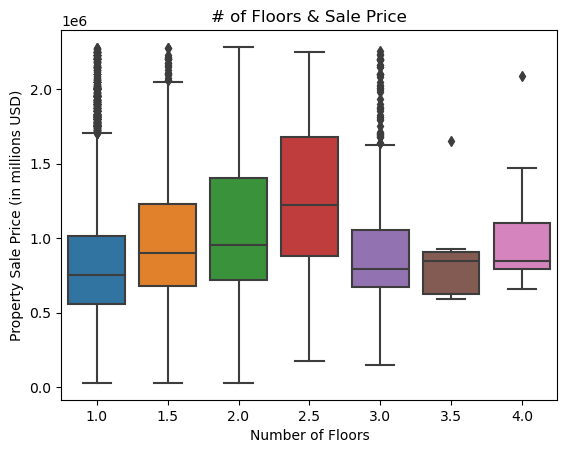

In [29]:
# plotting number of floors in relation to property sale price 
ax = sns.boxplot(x = 'floors', y = 'price', data = interior_feat)
ax.set_title("# of Floors & Sale Price")
ax.set_xlabel("Number of Floors")
ax.set_ylabel("Property Sale Price (in millions USD)")

In [30]:
# creating bins based on the quantiles for interior space not including basement 
pd.qcut(interior_feat['sqft_above'], q=4)

# creating a new column based on the quantiles / bins
interior_feat['house_inter_space'] = pd.qcut(interior_feat['sqft_above'], q=4)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

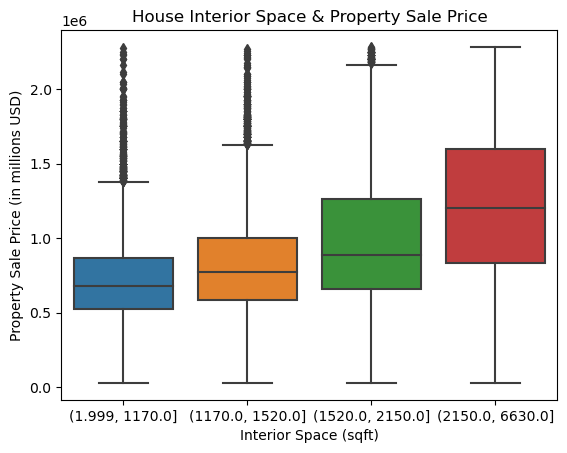

In [31]:
# plotting interior space as quantiles in relation to property sale price 
ax = sns.boxplot(x = 'house_inter_space', y = 'price', data = interior_feat)
ax.set_title("House Interior Space & Property Sale Price")
ax.set_xlabel("Interior Space (sqft)")
ax.set_ylabel("Property Sale Price (in millions USD)")

After binning, we can see that properties with larger interior space, *sans* basement, have an increased property sale price. Where 50% of properties are contained, that is data contained within the 2nd and 3rd box plots, an increse in `interior space` (sqft) contributes to a greater median sale price. Since `interior space` considers the square footage not including basement, there is a reasonable possibility that it is correlated with `floors`. 

### Collinearity Matrix for Property Interior Features

<Axes: >

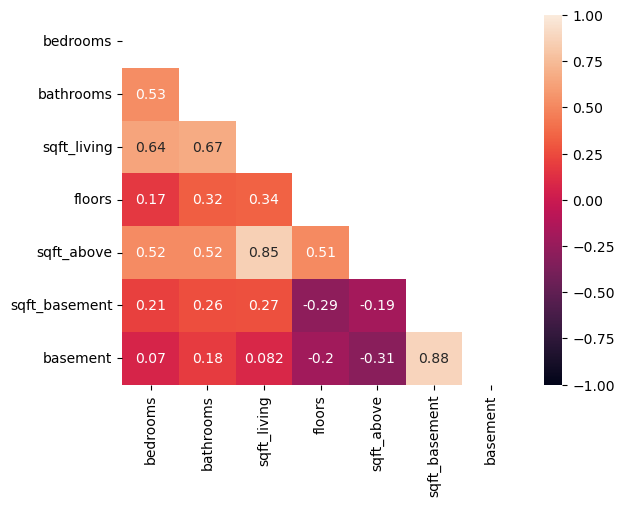

In [32]:
# dropping our target variable 'price'
interior_corr = interior_feat.drop(columns = ['price'])

# plotting a heatmap to check for collinearity among predictor variables
mask = np.triu(np.ones_like(interior_corr.corr(numeric_only = True), dtype=bool))
sns.heatmap(interior_corr.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

Among features related to the interior space, highly correlated variables include: 
- `bathrooms` and `bedrooms` and `sqft_living`
- `sqft_above` and `bathrooms` and `sqft_living` and `floors`
- `sqft_basement` and `basement`

Now that we've introduced a new variable `basement`, let's run our previous correlation matrix including our target variable `price` to determine whether it holds any weight. 

<Axes: >

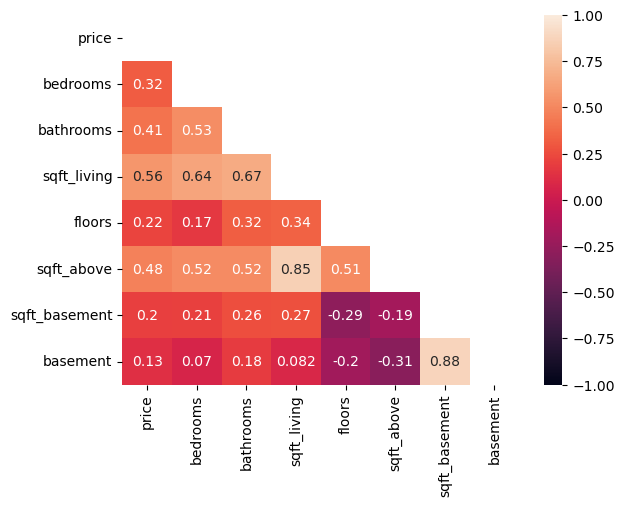

In [33]:
# plotting correlation matrix between interior prop features and price
mask = np.triu(np.ones_like(interior_feat.corr(numeric_only = True), dtype=bool))
sns.heatmap(interior_feat.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

The addition of whether a property has or does not have a basement is not strongly correlated with `price`. Our previous conclusion about `sqft_living` remains true. 

## Exterior Property Features
This section will cover an EDA of external property features (e.g. garage & patio sqft)

In [34]:
develop_houses.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'zipcode', 'city', 'sold_year',
       'sold_month', 'age_sold', 'renovated', 'price_group'],
      dtype='object')

In [35]:
# creating a new dataframe based on exterior property features 
exter_feat = develop_houses.loc[:,['price','sqft_lot', 'sqft_garage', 'sqft_patio']]

### Correlation Matrix Between 'Price' & Exterior Property Features

<Axes: >

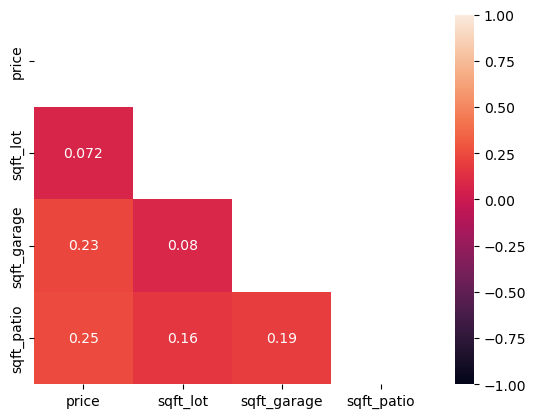

In [36]:
# plotting correlation matrix between exterior prop features and price
mask = np.triu(np.ones_like(exter_feat.corr(numeric_only = True), dtype=bool))
sns.heatmap(exter_feat.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

After plotting a heatmap of the correlation between features related to the property's exterior features and the target variable `price`, we can see that `sqft_patio` is somewhat correlated with price. Thus, it might be worth considering it as a key feature in our model.

### Property Size (`sqft_lot`)

Because the range for `sqft_lot` is large, it's helpful to plot it's distribution. This would allow us to visualize the lot sizes (in sqft) where there are a majority of properties within our dataset.

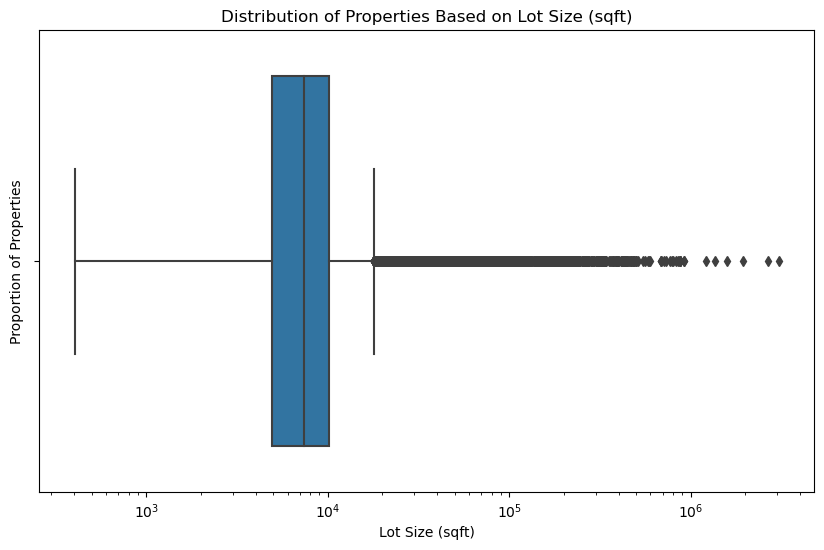

In [37]:
# viewing the distribution of properties based on lot size in sqft 
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x = 'sqft_lot', data = exter_feat)
ax.set_xlabel("Lot Size (sqft)")
ax.set_ylabel("Proportion of Properties")
ax.set_title("Distribution of Properties Based on Lot Size (sqft)")
ax.set_xscale('log')

After plotting a boxplot with the distribution of lot sizes, we can see that the overall distribution is not normal but skewed. Looking at the IQR of `sqft_lot`, we see that the distribution of `sqft_lot` has an upperbound of ~ `10,000` sqft. For our purposes, it might be prudent to utilize the IQR and bin our data based on quantiles so as to better understand different bins and their relation to median sale price.

In [38]:
# viewing the IQR range for living space 
exter_feat['sqft_lot'].describe()

count    2.670900e+04
mean     1.519803e+04
std      5.141201e+04
min      4.020000e+02
25%      4.940000e+03
50%      7.368000e+03
75%      1.012500e+04
max      3.067495e+06
Name: sqft_lot, dtype: float64

In [39]:
# creating bins based on the quantiles for living space
pd.qcut(exter_feat['sqft_lot'], q=4)

# creating a new column based on the quantiles / bins
exter_feat['lot_size'] = pd.qcut(exter_feat['sqft_lot'], q=4)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

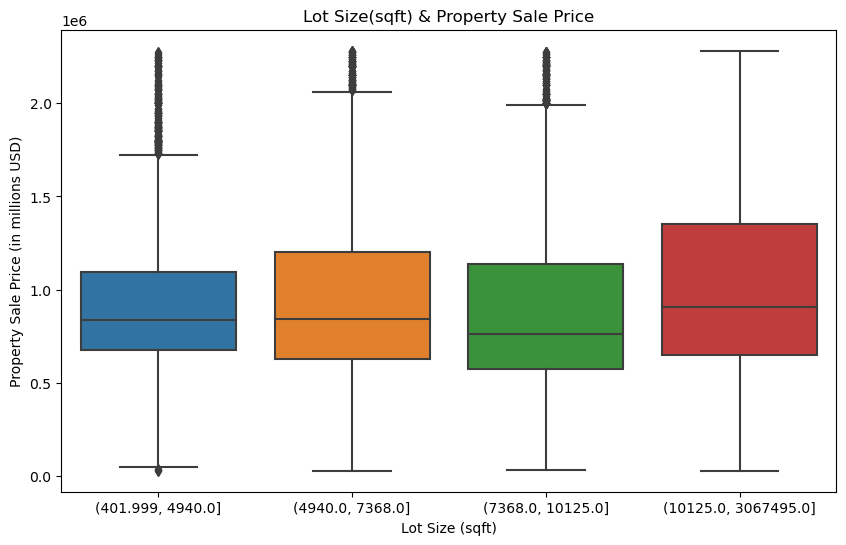

In [40]:
# plotting living space as quantiles in relation to property sale price 
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x = 'lot_size', y = 'price', data = exter_feat)
ax.set_title("Lot Size(sqft) & Property Sale Price")
ax.set_xlabel("Lot Size (sqft)")
ax.set_ylabel("Property Sale Price (in millions USD)")

After binning based on the IQR for `sqft_lot`, we can visualize how different `lot_size` categories (i.e., bins) have different median property sale prices. Here, the boxplot indicates that properties with lot sizes towards the end of the scale (10,320 and 3,067,495 sqft) have the highest median sale price. However, it should be noted that this `lot_size` bin contains the absolute maximum **and** outliers, thus the bin width contains a greater range compared to the other three bins. If we focus on the second and third boxplot, which represent our 1st and 3rd quartile (~50% of our data), and thus where the majority of properties exist, `lot_size` has a negligble or negative effect on median sale price. 

### Garage

Let's consider whether the addition of a garage affects property sale price, regardless of `sqft_garage`.

In [41]:
exter_feat['garage'] = exter_feat['sqft_garage'] != 0

Text(0, 0.5, 'Property Sale Price (in millions USD)')

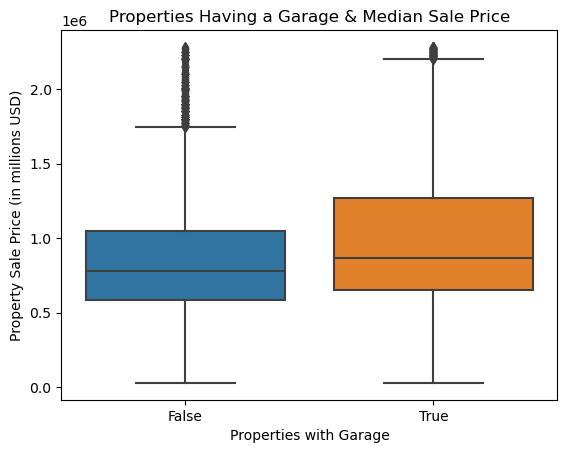

In [42]:
ax = sns.boxplot(x = 'garage', y = 'price', data = exter_feat)
ax.set_title("Properties Having a Garage & Median Sale Price")
ax.set_xlabel("Properties with Garage")
ax.set_ylabel("Property Sale Price (in millions USD)")

After filtering the data based on whether the property has a garage or not, we can see that there is an increase in the median sale price among properties that have a garage vs those that do not. 

### Patio

Let's also do the same for patio. 

In [43]:
# creating a new column 'patio' based on whether the property has a patio or not
exter_feat['patio'] = exter_feat['sqft_patio'] != 0

Text(0, 0.5, 'Property Sale Price (in millions USD)')

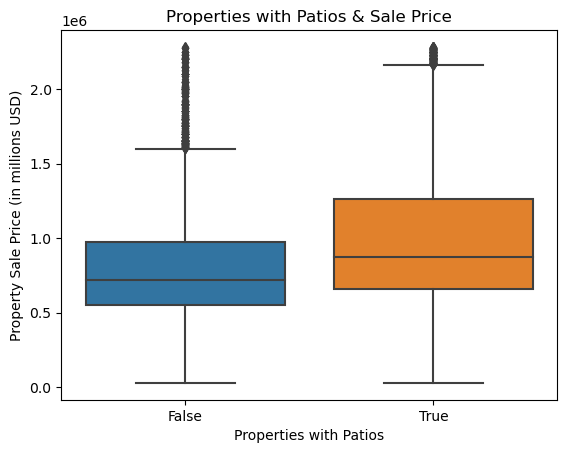

In [44]:
ax = sns.boxplot(x = 'patio', y = 'price', data = exter_feat)
ax.set_title("Properties with Patios & Sale Price")
ax.set_xlabel("Properties with Patios")
ax.set_ylabel("Property Sale Price (in millions USD)")

### Collinearity Matrix for Property Exterior Features

<Axes: >

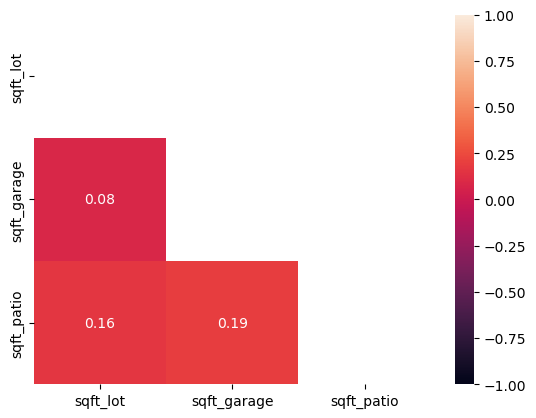

In [45]:
# creating a new dataframe only including our predictor variables rel. to exterior features
exterior_corr = exter_feat.drop(columns = ['price', 'patio', 'garage'])

# plotting a heatmap to check for collinearity among predictor variables
mask = np.triu(np.ones_like(exterior_corr.corr(numeric_only = True), dtype=bool))
sns.heatmap(exterior_corr.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

The above heat map evaluates the collinearity for features related to a property's exterior characteristics. We can see that there is relatively low collinearity between these features. 

However, because we introduced new variables such as `garage` and `patio` which take into consideration whether a property has a garage or patio, respectively, we should take a look at the updated correlation matrix between all predictor variables and our target variable `price`.

### Updating Correlation Matrix for Property Exterior Features

<Axes: >

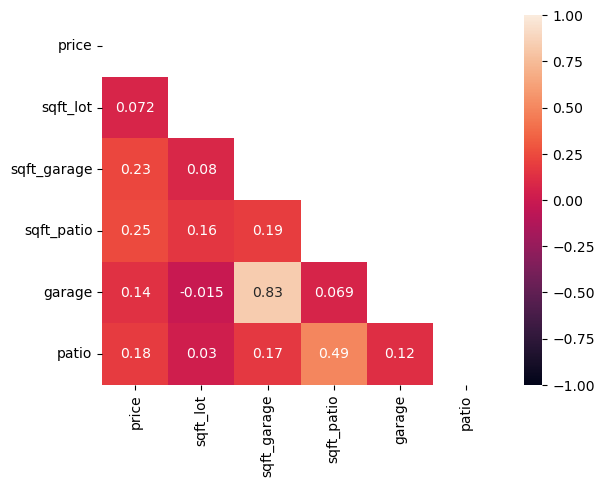

In [46]:
# plotting correlation matrix between exterior prop features and price
mask = np.triu(np.ones_like(exter_feat.corr(numeric_only = True), dtype=bool))
sns.heatmap(exter_feat.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)

Looking at our updated matrix, we can see that whether a property has a `garage` or `patio` has a weak correlation to our target variable `price`.

## Environmental Property Features

Because environmental property features are mostly categorical with different categories, we'll examine it's relationship to `price` using other visualization methods (e.g., a boxplot)

In [47]:
# subsetting all features related to property environment
envir_feat = develop_houses.loc[:,['price', 'greenbelt', 'nuisance', 'view']]

### Greenbelt

Text(0, 0.5, 'Property Sale Price (in millions USD)')

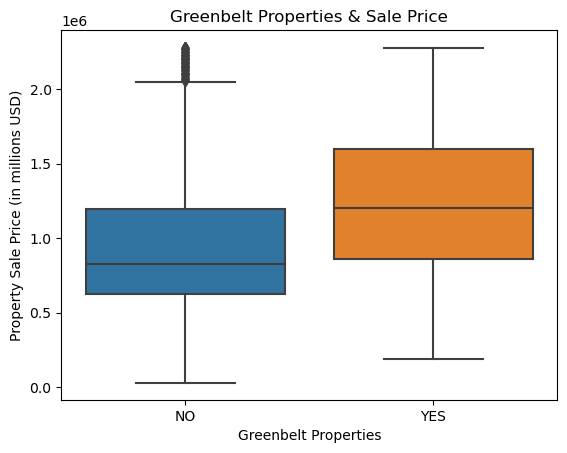

In [48]:
ax = sns.boxplot(x = 'greenbelt', y = 'price', data = envir_feat)
ax.set_title("Greenbelt Properties & Sale Price")
ax.set_xlabel("Greenbelt Properties")
ax.set_ylabel("Property Sale Price (in millions USD)")

Properties located next to a `greenbelt`, such as it's proximity to natural, undeveloped, or agricultural lands, have an increased median sale price. 

### Nuisance

In [49]:
develop_houses['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

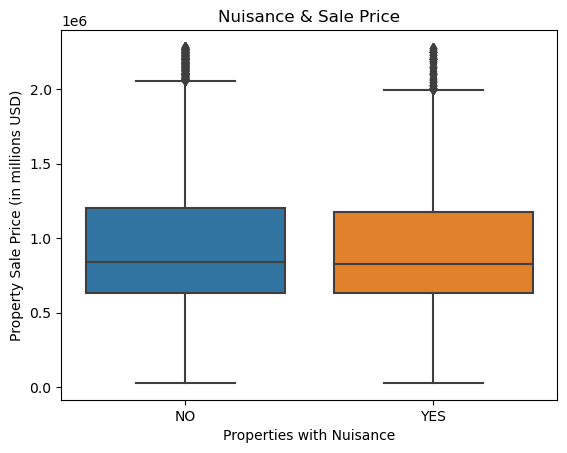

In [50]:
ax = sns.boxplot(x = 'nuisance', y = 'price', data = envir_feat)
ax.set_title("Nuisance & Sale Price")
ax.set_xlabel("Properties with Nuisance")
ax.set_ylabel("Property Sale Price (in millions USD)")

Properties with/without `nuisance`, that is whether the property has traffic noise or other related disturbances has a negligible effect on median sale price. 

### View

Text(0, 0.5, 'Property Sale Price (in millions USD)')

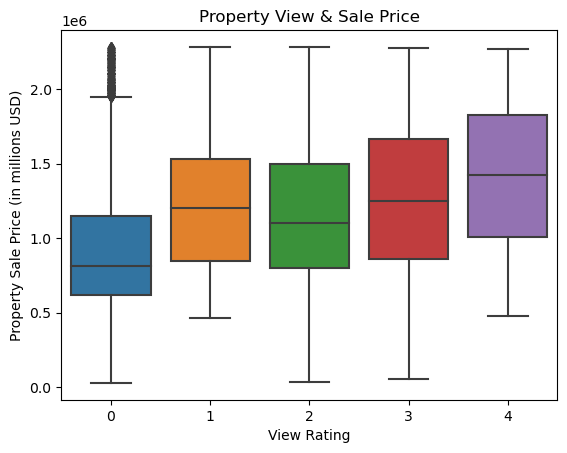

In [51]:
# plotting the relationship between different view categories and price
ax = sns.boxplot(x = 'view', y = 'price', data = envir_feat)
ax.set_title("Property View & Sale Price")
ax.set_xlabel("View Rating")
ax.set_ylabel("Property Sale Price (in millions USD)")

Properties with a `Fair`, `Good`, and `Excellent` `View` have an increased median sale price. However it is hard to determine whether there is a linear relationship between `view` and `price`.

## Property Location

In order to better understand the distribution of property prices based on location, we decided to create a scatterplot heat map utilizing the `lat` and `long` of properties and `price`.

In [52]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import CARTODBPOSITRON_RETINA
from bokeh.palettes import Turbo256
from bokeh.transform import linear_cmap
from bokeh.models import ColorBar, NumeralTickFormatter
import pyproj

# Specify the target area bounds
x_range = (-13600000, -13540000)  # Longitude range
y_range = (6050000, 6150000)      # Latitude range
# Create a figure with specified x-axis and y-axis ranges
p = figure(title='King County House Sales 2021-2022',
           x_axis_type='mercator', y_axis_type='mercator',
           x_axis_label='Longitude', y_axis_label='Latitude',
           tooltips=[('Price', '@price'), ('Zipcode', '@zipcode')],
           x_range=x_range, y_range=y_range)
# Define the tile provider for the background map
p.add_tile(CARTODBPOSITRON_RETINA)
# Define the projection transformation from lon/lat to Web Mercator
proj = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)
# Convert lon/lat coordinates to Web Mercator
develop_houses['x'], develop_houses['y'] = zip(*develop_houses.apply(
    lambda row: proj.transform(row['long'], row['lat']), axis=1))
# Create a ColumnDataSource for your data
source = ColumnDataSource(data=develop_houses)
# Define the color mapping using linear_cmap
palette = Turbo256
color_mapper = linear_cmap(field_name='price', palette=palette,
                           low=develop_houses['price'].min(),
                           high=develop_houses['price'].max())
# Add your scatter plot
p.circle(x='x', y='y', color=color_mapper, source=source)
# Create a color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'],
                     formatter=NumeralTickFormatter(format='0,0'),
                     label_standoff=13, width=8, location=(0, 0))
# Add the color bar to the plot
p.add_layout(color_bar, 'right')
# Enable Bokeh to display plots in Jupyter Notebook
output_notebook()
# Show the plot
show(p)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_23296\2379737435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  develop_houses['x'], develop_houses['y'] = zip(*develop_houses.apply(
C:\Users\Kevin\AppData\Local\Temp\ipykernel_23296\2379737435.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  develop_houses['x'], develop_houses['y'] = zip(*develop_houses.apply(


Loading BokehJS ...

Our map shows that properties listed around `$500,000` are located below Seattle around cities like Renton and Burien. Properties close to water, but not considered `waterfront` properties, have an increased sale price, which is consistent with our analysis. Additionally, properties in uptown Seattle have an increased property sale price of about `$1,500,000`.

## Conclusions

In this notebook, we have outlined our exploratory data analysis workflow. To better understand the characteristics of properties in relation to sale price, we have broken up features into different subgroups including:
- `prop_infra` | `condition`, `grade`, and `renovated`
- `interior_feat` | `bedrooms`, `bathrooms`, `sqft_living`, `floors`, `sqft_above`, `sqft_basement`
- `exter_feat` |`sqft_lot`, `sqft_garage`, `sqft_patio`
- `envir_feat` | `waterfront`, `greenbelt`, `nuisance`
- `geo_feat` | `zipcode`, `city`

**What features are worth considering for a linear regression model?**

Variables that are closely correlated to `price` and may be considered good predictors for `price` include: 
- `grade`
- `bedrooms`, `bathrooms`
- `sqft_living`
- `greenbelt`
- `sqft_above`
- `sqft_patio`
- `condition`
- `zipcode`

However, these variable all exhibit some degree of multicollinearity between each other, which should be considered when modeling. 